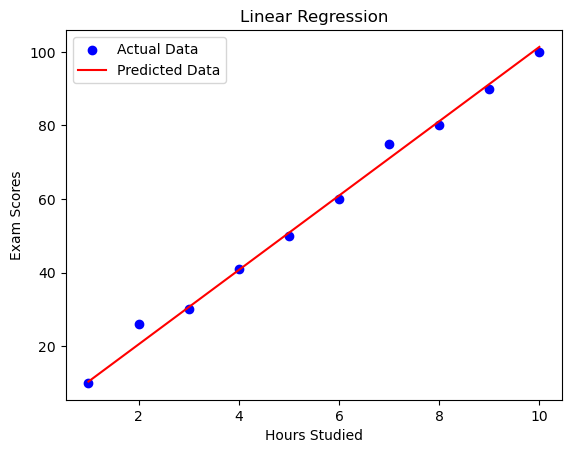

In [20]:
# student scores based on hours studied.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# load dataset
data_set = {
    'hours_studied': [1,2,3,4,5,6,7,8,9,10],
    'exam_scores': [10,26,30,41,50,60,75,80,90,100]
}
dataFrame = pd.DataFrame(data_set)
dataFrame


# split data

X = dataFrame.drop(columns='exam_scores')
y = dataFrame['exam_scores']

# train model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

pred = model.predict(X_test)
pred

# plot visualize
plt.scatter(X,y,color='blue',label='Actual Data')
plt.plot(X,model.predict(X),color='red',label='Predicted Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Linear Regression')
plt.legend()
plt.show()




c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


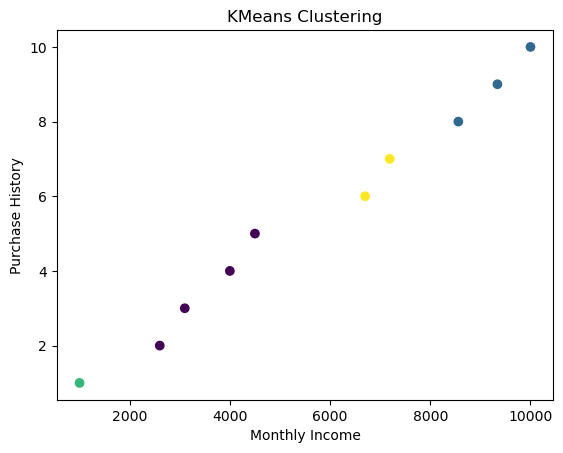

In [18]:
# group customer based on their purchase and annual incomes.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load dataset

data_set={
    'monthly_income':[1000,2600,3100,4000,4500,6700,7190,8560,9340,10000],
    'purchase_history':[1,2,3,4,5,6,7,8,9,10]
}

df = pd.DataFrame(data_set)
# Train K_Menas model

k_means = KMeans(n_clusters=4,random_state=42)

df['Cluster']= k_means.fit_predict(df)

plt.scatter(df['monthly_income'],df['purchase_history'],c=df['Cluster'],cmap='viridis')
plt.xlabel('Monthly Income')
plt.ylabel('Purchase History')
plt.title('KMeans Clustering')
plt.show()




In [24]:
import numpy as np

# 1️⃣ Create the Grid Environment
grid_size = 4  # 4x4 Grid
goal_position = (3, 3)  # Goal at bottom-right
start_position = (0, 0)  # Start at top-left

# 2️⃣ Initialize Q-Table
state_size = grid_size * grid_size  # 16 states
action_size = 4  # 4 possible actions: 0=Up, 1=Down, 2=Left, 3=Right
Q_table = np.zeros((state_size, action_size))

# 3️⃣ Define actions
def get_next_position(position, action):
    x, y = position
    if action == 0 and x > 0:  # Move Up
        x -= 1
    elif action == 1 and x < grid_size - 1:  # Move Down
        x += 1
    elif action == 2 and y > 0:  # Move Left
        y -= 1
    elif action == 3 and y < grid_size - 1:  # Move Right
        y += 1
    return (x, y)

# 4️⃣ Training parameters
learning_rate = 0.8
discount_factor = 0.9
episodes = 1000
exploration_prob = 1.0
exploration_decay = 0.99
min_exploration = 0.01

# 5️⃣ Training loop
for episode in range(episodes):
    position = start_position  # Reset to start
    done = False

    while not done:
        state = position[0] * grid_size + position[1]  # Convert position to state ID
        
        # Choose action (Explore or Exploit)
        if np.random.rand() < exploration_prob:
            action = np.random.choice(action_size)  # Random action
        else:
            action = np.argmax(Q_table[state, :])  # Best learned action
        
        new_position = get_next_position(position, action)
        new_state = new_position[0] * grid_size + new_position[1]

        # Reward: +1 for reaching goal, else -0.1
        reward = 1 if new_position == goal_position else -0.1
        done = new_position == goal_position  # Stop if reached goal

        # Update Q-Table
        Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + \
                                 learning_rate * (reward + discount_factor * np.max(Q_table[new_state, :]))

        position = new_position  # Move to next position

    # Reduce exploration probability
    exploration_prob = max(min_exploration, exploration_prob * exploration_decay)

print("✅ AI Training Complete!")

# 6️⃣ AI Testing: Play 5 Games
for game in range(5):
    position = start_position
    print(f"\n🎮 **Game {game+1}**")
    
    while position != goal_position:
        state = position[0] * grid_size + position[1]
        action = np.argmax(Q_table[state, :])  # Choose best action
        position = get_next_position(position, action)
        print(f"🚀 AI moves to {position}")

print("🎯 AI Successfully Reaches the Goal!")


✅ AI Training Complete!

🎮 **Game 1**
🚀 AI moves to (1, 0)
🚀 AI moves to (2, 0)
🚀 AI moves to (2, 1)
🚀 AI moves to (3, 1)
🚀 AI moves to (3, 2)
🚀 AI moves to (3, 3)

🎮 **Game 2**
🚀 AI moves to (1, 0)
🚀 AI moves to (2, 0)
🚀 AI moves to (2, 1)
🚀 AI moves to (3, 1)
🚀 AI moves to (3, 2)
🚀 AI moves to (3, 3)

🎮 **Game 3**
🚀 AI moves to (1, 0)
🚀 AI moves to (2, 0)
🚀 AI moves to (2, 1)
🚀 AI moves to (3, 1)
🚀 AI moves to (3, 2)
🚀 AI moves to (3, 3)

🎮 **Game 4**
🚀 AI moves to (1, 0)
🚀 AI moves to (2, 0)
🚀 AI moves to (2, 1)
🚀 AI moves to (3, 1)
🚀 AI moves to (3, 2)
🚀 AI moves to (3, 3)

🎮 **Game 5**
🚀 AI moves to (1, 0)
🚀 AI moves to (2, 0)
🚀 AI moves to (2, 1)
🚀 AI moves to (3, 1)
🚀 AI moves to (3, 2)
🚀 AI moves to (3, 3)
🎯 AI Successfully Reaches the Goal!
